In [3]:
from dqn_agent import DQNAgent
from nn_model import NeuralNetwork
from memory import ExperienceReplayMemory
from environment import SingleStockEnv
from scaler_state import get_scaler
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import talib
import seaborn as sns
import torch
import numpy as np
import plotly.graph_objects as go
import pyfolio as pf
import empyrical
from tqdm.notebook import tqdm 
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


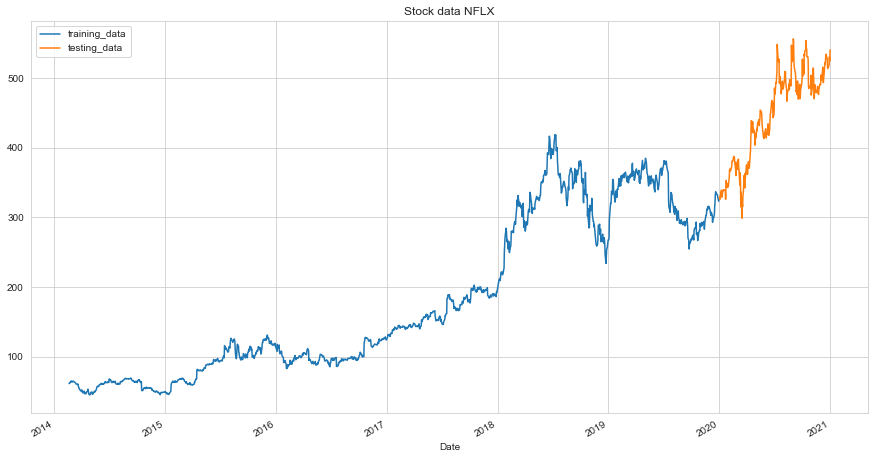

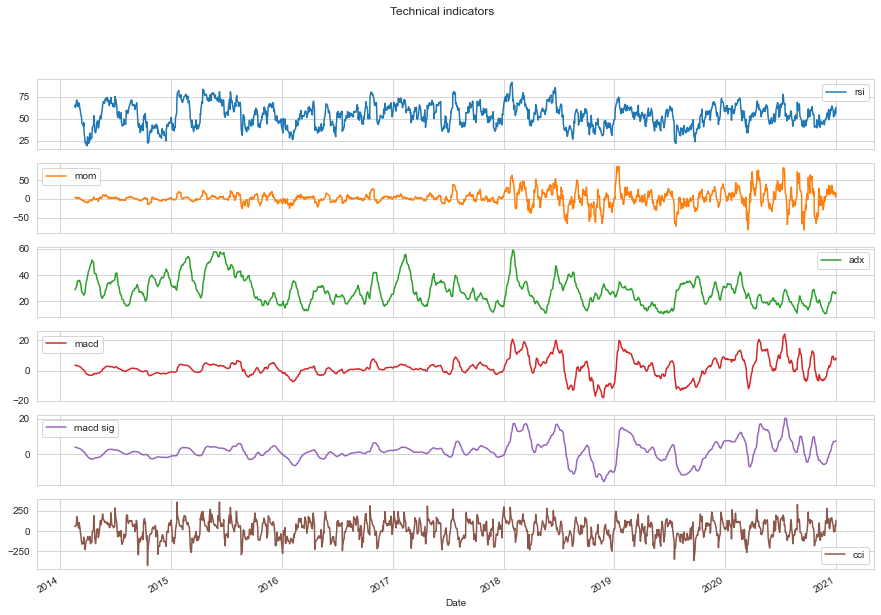

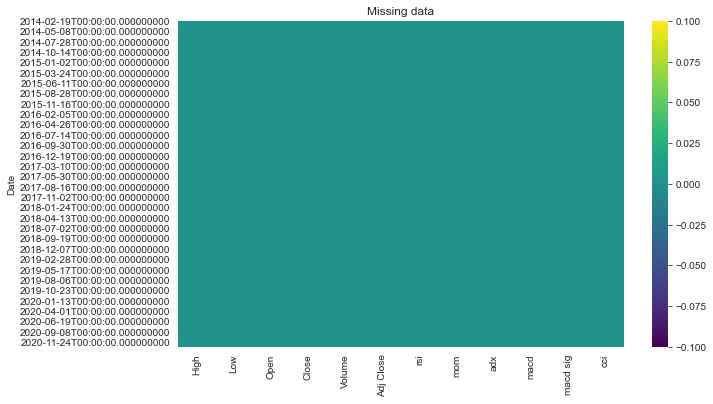

In [4]:
stock_name = 'nflx'.upper()
stock_data = web.DataReader(stock_name, 'yahoo', '2014-01-01', '2021-01-01')
stock_data['rsi'] = talib.RSI(stock_data['Adj Close'])
stock_data['mom'] = talib.MOM(stock_data['Adj Close'])
stock_data['adx'] = talib.ADX(stock_data['High'], stock_data['Low'], stock_data['Adj Close'])
stock_data['macd'], stock_data['macd sig'], _ = talib.MACD(stock_data['Adj Close'])
stock_data['cci'] = talib.CCI(stock_data['High'], stock_data['Low'], stock_data['Adj Close'])
stock_data.dropna(axis=0, inplace=True)

train_data = stock_data.iloc[:-253]
test_data = stock_data.iloc[-253:]

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom', 'adx', 'macd', 'macd sig', 'cci']].plot(subplots=True, figsize=(15,10), title='Technical indicators');
plt.show()


plt.figure(figsize=(10,6))
sns.heatmap(stock_data.isnull(), cmap='viridis');
plt.title('Missing data');
plt.show()

In [ ]:
num_episodes = 500
capital = 1000000
position = 1000
train_env = SingleStockEnv(train_data, capital, position)
state_size = train_env.state_dim
action_size = len(train_env.action_space)
agent = DQNAgent(input_sz=state_size, action_sz=action_size, discount_factor=0.9, ticker=stock_name)
scaler = get_scaler(train_env)